<a href="https://colab.research.google.com/github/Serradjchaimaa27/Alos_act2/blob/main/Gastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall mealpy 
!pip install mealpy==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.4/20.4 MB 11.6 MB/s eta 0:00:00


In [2]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 56.9 MB/s eta 0:00:00


# **Les bibliothèques réquis**



In [3]:
import numpy as np
import glob
from PIL import Image
from scipy import misc
import scipy.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize
import os.path
import scipy
import visualkeras
import skimage.feature as ft
from tqdm import tqdm
from google.colab import drive
from sklearn import metrics

from pickle import dump
from google.colab import files
from tensorflow.keras.layers import Dense, Flatten
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications import ResNet50
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metric
from astropy.table import Table
from astropy.io import ascii
from mealpy.bio_based import SMA
from mealpy.swarm_based import AO
from mealpy.math_based import CGO
from mealpy.evolutionary_based import GA
from mealpy.swarm_based import PSO
from mealpy.swarm_based import ACOR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc, log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
import seaborn as sn
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [4]:

def plot_roc_curve(X, y, _classifier, caller):
    # keep the algorithm's name to be written down into the graph
    algor_name = type(_classifier).__name__
    
    # put y into multiple columns for OneVsRestClassifier
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]
# split train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size = 0.3, random_state = 5)
# For each classifier, the class is fitted against all the other classes
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fig = plt.figure()
    plt.style.use('default')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('ROC to multi-class: ' + caller)
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
def plot_precision_recall_curve(X, y, _classifier, caller):
    # keep the algorithm's name to be written down into the graph
    algor_name = type(_classifier).__name__
    
    # put y into multiple columns for OneVsRestClassifier
    onehotencoder = OneHotEncoder()
    y_hat = onehotencoder.fit_transform(y.reshape(-1,1)).toarray()
    n_classes = y_hat.shape[1]
# split train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y_hat, test_size = 0.3, random_state = 5)
# For each classifier, the class is fitted against all the other classes
    clf_ovr = OneVsRestClassifier(_classifier)
    clf_ovr.fit(X_train, y_train)
    y_proba = clf_ovr.predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fig = plt.figure()
    plt.style.use('default')
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_proba[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='PR Curve of class {}'.format(i))
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="lower right", prop={'size': 10})
    plt.title('Precision-Recall to multi-class: ' + caller)
    plt.suptitle(algor_name, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# **charger dataset from Google drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploration des données**

In [6]:
data_dir = '/content/drive/MyDrive/dataset/Kvasir-v2'


In [7]:
classes = os.listdir(data_dir)
print('Number of classes:', len(classes))

Number of classes: 8


In [8]:
# Parcourir chaque classe et compter le nombre d'images dans chaque classe
for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    num_imgs = len(os.listdir(cls_dir))
    print('Class:', cls, '| Number of images:', num_imgs)

Class: dyed-lifted-polyps | Number of images: 1000
Class: dyed-resection-margins | Number of images: 1000
Class: esophagitis | Number of images: 1000
Class: normal-cecum | Number of images: 1000
Class: normal-pylorus | Number of images: 1000
Class: normal-z-line | Number of images: 1000
Class: polyps | Number of images: 1000
Class: ulcerative-colitis | Number of images: 1000


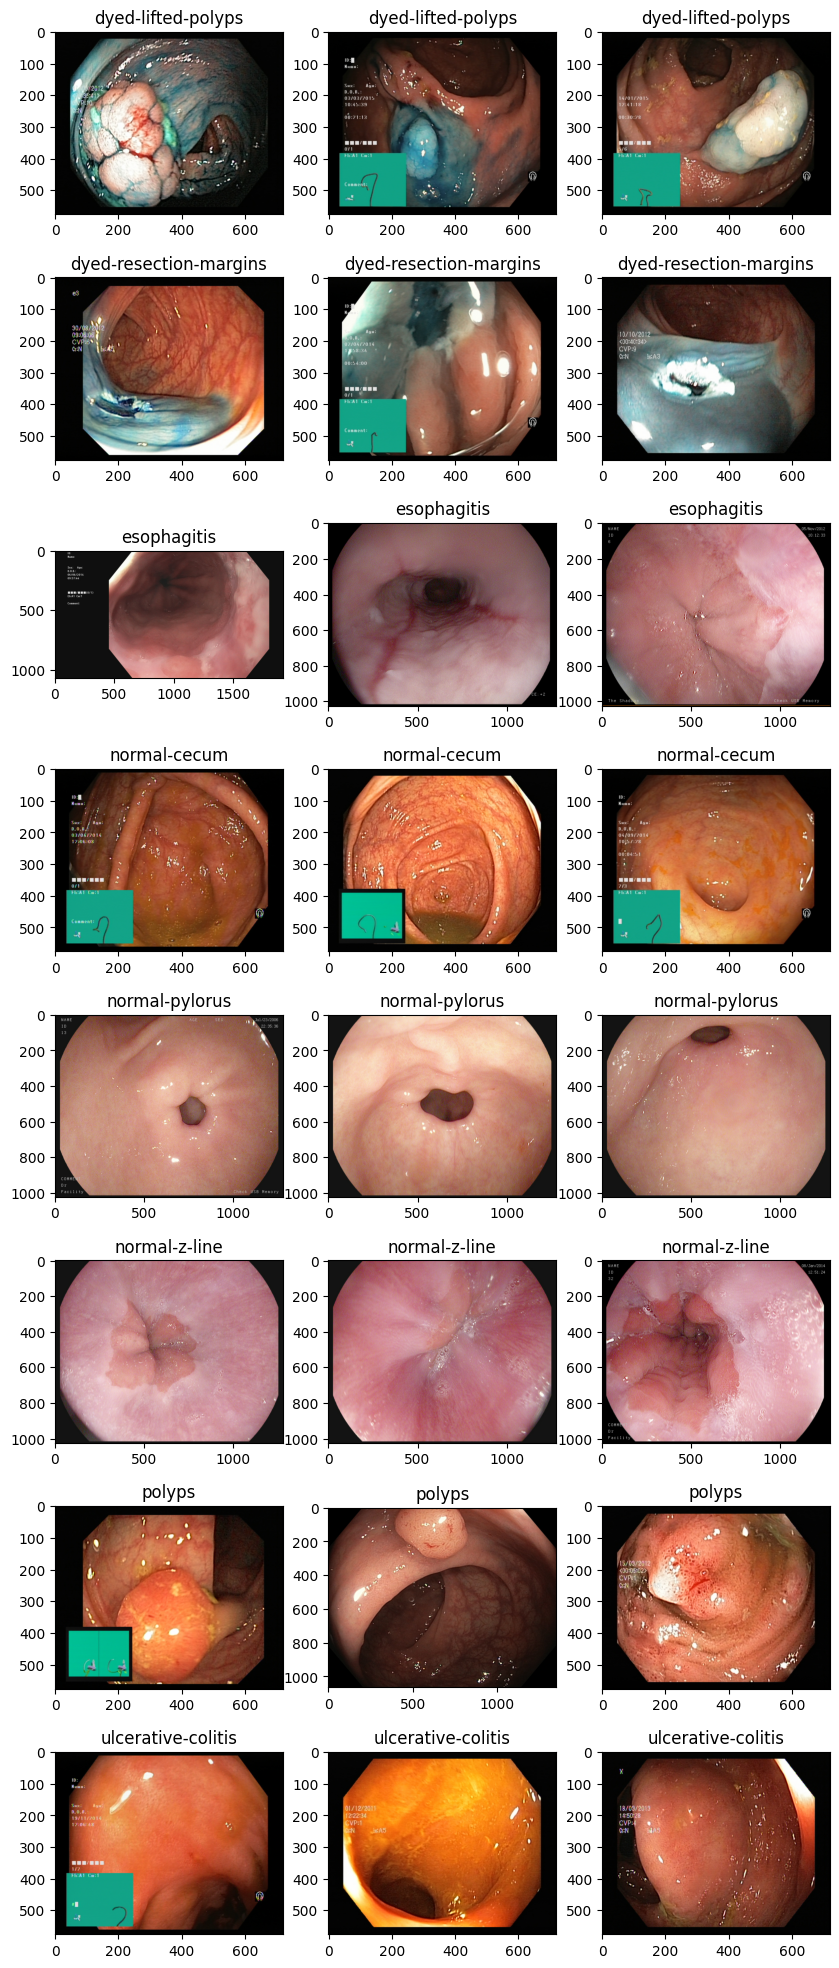

In [9]:
# Plot sample images from each class
fig, axes = plt.subplots(nrows=len(classes), ncols=3, figsize=(10, 25))
for i, c in enumerate(classes):
    class_dir = os.path.join(data_dir, c)
    images = os.listdir(class_dir)[:3]
    for j, img in enumerate(images):
        img_path = os.path.join(class_dir, img)
        axes[i, j].imshow(plt.imread(img_path))
        axes[i, j].set_title(c)

# **Redimensionner Les images**

In [10]:

X_img = io.loadmat('/content/drive/MyDrive/dataset/Save/X_img_ENTREN_224.mat');X_img=X_img['X_img'];
YY= io.loadmat('/content/drive/MyDrive/dataset/Save/Y_SORTIEN.mat');YY=YY['Y']
clas= io.loadmat('/content/drive/MyDrive/dataset/Save/clasn_lib.mat');clas=clas['clas_lib']
print(np.unique(clas).shape)

(8,)


# **Les modéles**

## **VGG16**

553467096/553467096 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

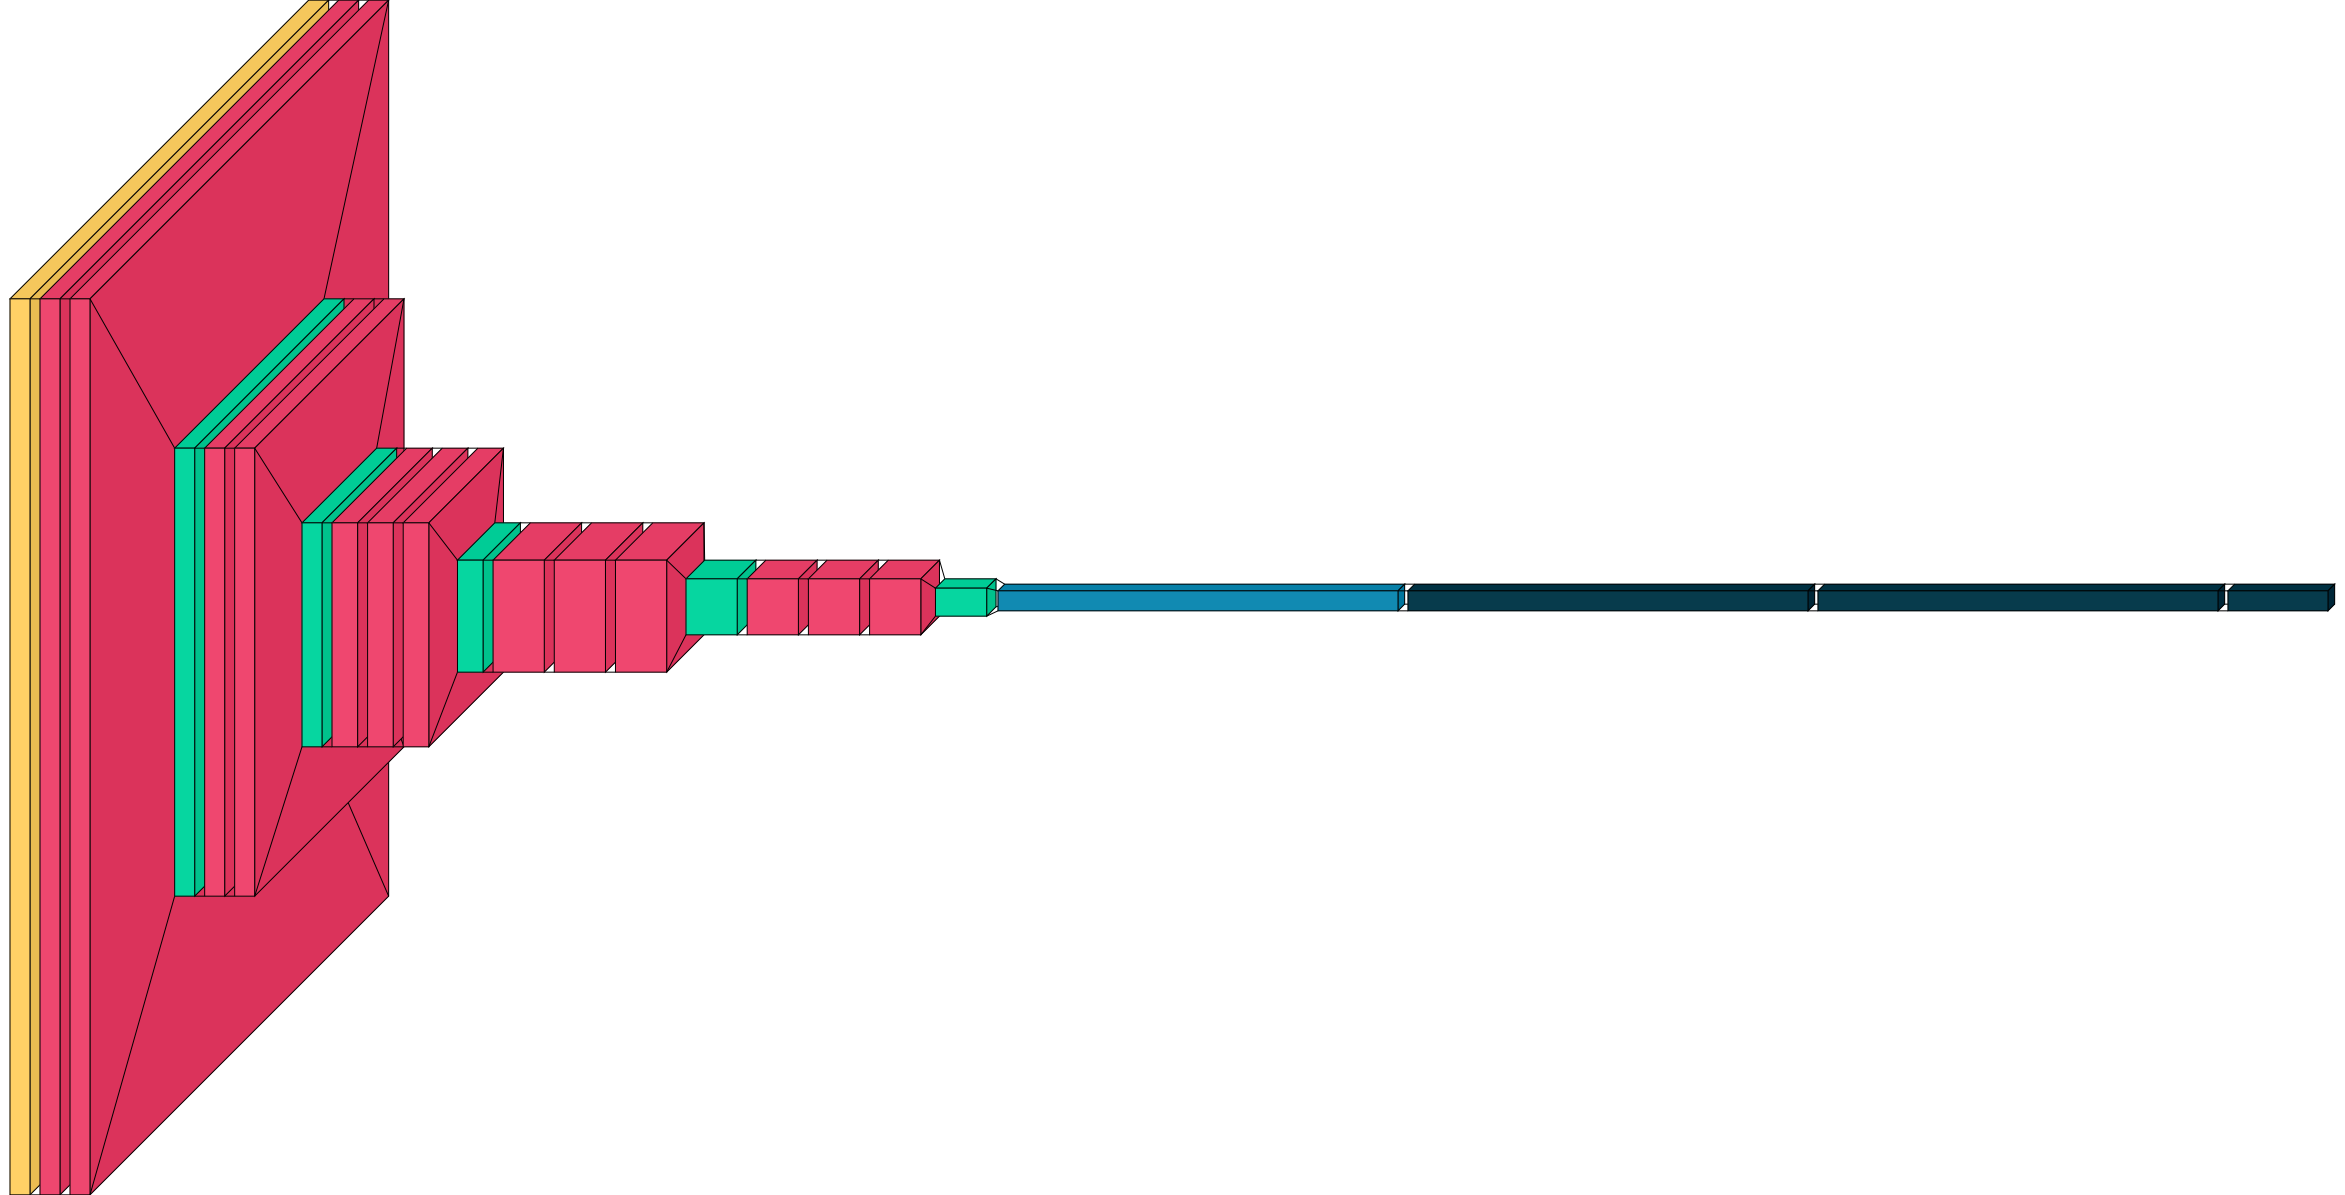

In [11]:
model_VGG16 = VGG16()
model_VGG16.summary()
visualkeras.layered_view(model_VGG16)

In [12]:
def extract_featurs_VGG16(model_VGG16, X_img):
    # remove the last layer to obtain the features from the layer before it
    model_VGG16 = Model(inputs=model_VGG16.inputs, outputs=model_VGG16.layers[-2].output)
    # get extracted features   
    featurs_VGG16 = []
    for i in range(X_img.shape[0]):         
        image = X_img[i,:,:,:]
        image = keras.utils.img_to_array(image, data_format=None, dtype=None)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        feature = model_VGG16.predict(image)
        featurs_VGG16 .append(feature)
    featurs_VGG16  = np.array(featurs_VGG16)
    return featurs_VGG16 

In [13]:
featurs_VGG16 = extract_featurs_VGG16(model_VGG16, X_img)
print(featurs_VGG16.shape)
io.savemat('/content/drive/MyDrive/dataset/Save/vgg16'+'/featurs_VGG16.mat', {'featurs_VGG16':featurs_VGG16})  
files.download('/content/drive/MyDrive/dataset/Save/vgg16'+'/featurs_VGG16.mat') 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1/1 [==============================] - 0s 24ms/step
(8000, 1, 4096)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
mod_vgg16= io.loadmat('/content/drive/MyDrive/dataset/Save/vgg16/featurs_VGG16.mat');mod_vgg16=mod_vgg16['featurs_VGG16']
mod_vgg16.shape=(mod_vgg16.shape[0],mod_vgg16.shape[2])
print(mod_vgg16.shape)

(8000, 4096)


Accuracy:  0.725
f_score:  0.7216096339596955
precision:  0.7372573161133299
recall:  0.725


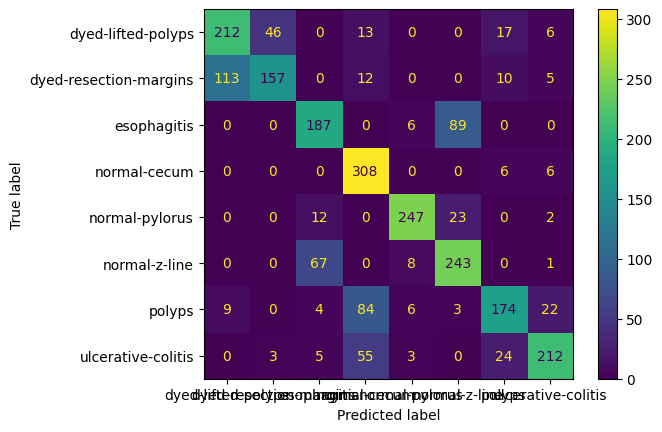

In [15]:
taux = 30
x_train, x_test, y_train, y_test = train_test_split(mod_vgg16,clas, test_size= taux/100)

classifier = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc1 = accuracy_score(y_test,y_pred)            
MAt=confusion_matrix(y_test,y_pred)       
f_score1  = f1_score(y_test, y_pred, average='weighted')     
precision1= precision_score(y_test, y_pred, average='weighted')
recall1  = recall_score(y_test, y_pred, average='weighted')
Y=y_test,y_pred
print('Accuracy: ',acc1)
print('f_score: ',f_score1)
print('precision: ',precision1)
print('recall: ',recall1)
classes = ['dyed-lifted-polyps','dyed-resection-margins','esophagitis','normal-cecum','normal-pylorus','normal-z-line','polyps','ulcerative-colitis']
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = MAt, display_labels = classes)
cm_display.plot()
plt.show()

(5600, 2018)    (2400, 2018)
Accuracy:  0.7175
f_score:  0.7134632572467827
precision:  0.7324837356074437
recall:  0.7175


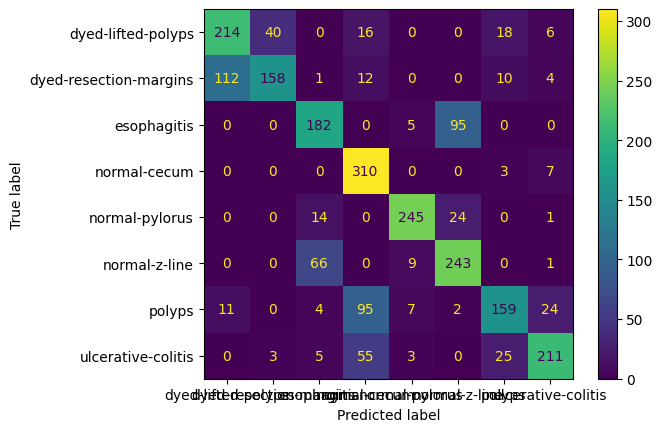

In [16]:
# ===================Exemple de selection ======================================
solution = np.random.rand(x_train.shape[1])
g = solution    
g[abs(g)>=0.5]=1
g[abs(g)<0.5]=0  
BLK = g
result = np.where(BLK == 1)   
x_train=x_train[:,result[0]]   
x_test=x_test[:,result[0]]   
print(x_train.shape,'  ',x_test.shape)

classifier = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc2 = accuracy_score(y_test,y_pred)            

MAt=confusion_matrix(y_test,y_pred)        

f_score2  = f1_score(y_test, y_pred, average='weighted')     
precision2= precision_score(y_test, y_pred, average='weighted')
recall2  = recall_score(y_test, y_pred, average='weighted')
Y=y_test,y_pred
print('Accuracy: ',acc2)
print('f_score: ',f_score2)
print('precision: ',precision2)
print('recall: ',recall2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = MAt, display_labels = classes)
cm_display.plot()
plt.show()


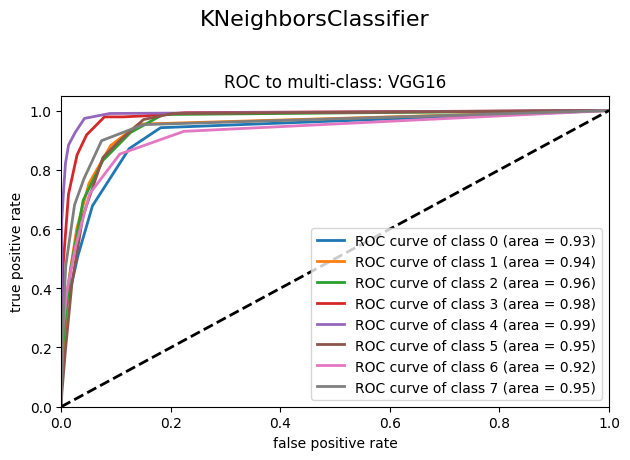

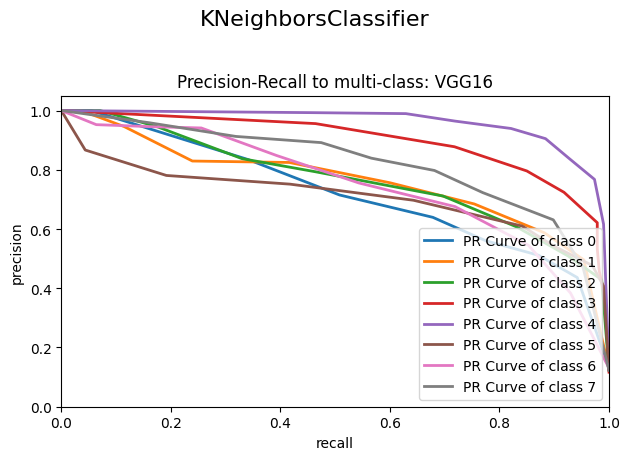

In [17]:
X = mod_vgg16
y = clas
caller='VGG16'
# Need more research to plot the ROC and PR curve for XGBoost and SVC
if not isinstance(classifier, (XGBClassifier, SVC)):
    try:
        plot_roc_curve(X, y, classifier, caller)
    except ValueError:
        print("Error: cannot plot the ROC Curve.")
        
    try:
        plot_precision_recall_curve(X, y, classifier, caller)        
    except ValueError:
        print("Error: cannot plot the PR Curve.")

**Deux algorithmes AO ,AG,PSOet CGO pour la selection d'atribut**


* Fonction Fitness 1 C Accuracy

In [18]:
size_chrom = x_train.shape[1]


def Calc_parm(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)  
    X_TR = []; X_TE = []        
    X_TR = x_train[:,result[0]]    
    X_TE = x_test[:,result[0]]        
    classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
    classifier3.fit(X_TR, y_train)
    y_pred = classifier3.predict(X_TE)
    acc = accuracy_score(y_test,y_pred)                
    MAt=confusion_matrix(y_test,y_pred)        
    f_score  = f1_score(y_test, y_pred, average='weighted')     
    precision= precision_score(y_test, y_pred, average='weighted')
    recall   = recall_score(y_test, y_pred, average='weighted')
    Y=y_test,y_pred    
    return acc,f_score,precision,recall,MAt

def Fitness_function(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)    
    if np.array(result).shape[1]==0 or np.array(result).shape[1]==size_chrom:
        acc = 0
    else:
        X_TR = []; X_TE = []        
        X_TR = x_train[:,result[0]]    
        X_TE = x_test[:,result[0]]        
        classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
        classifier3.fit(X_TR, y_train)
        y_pred = classifier3.predict(X_TE)
        acc = accuracy_score(y_test,y_pred)            
    return acc   

problem_dict1 = {
    "fit_func": Fitness_function,
    "lb": [0, ] * size_chrom,
    "ub": [1, ] * size_chrom,
    "minmax": "max",
    "log_to": None,
    "save_population": True,
}

# Run the algorithm AO
print('-----------AO-----------')
model_AO = AO.OriginalAO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_AO.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

A = Calc_parm(best_position)
print('Accuracy: ',A[0])
print('f_score: ',A[1])
print('precision: ',A[2])
print('recall: ',A[3])
model_AO.history.save_global_objectives_chart(filename="save_AO/goc_vgg16")
model_AO.history.save_local_objectives_chart(filename="save_AO/loc_vgg16")

print('-----------CGO-----------')

# Run the algorithm GWO
model_CGO = CGO.OriginalCGO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_CGO.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

G = Calc_parm(best_position)
print('Accuracy: ',G[0])
print('f_score: ',G[1])
print('precision: ',G[2])
print('recall: ',G[3])

model_CGO.history.save_global_objectives_chart(filename="save_CGO/goc_vgg16")
model_CGO.history.save_local_objectives_chart(filename="save_CGO/loc_vgg16")

# Run the algorithm AG
print('-----------AG-----------')
model_GA = GA.BaseGA(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_GA.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

AG = Calc_parm(best_position)
print('Accuracy: ',AG[0])
print('f_score: ',AG[1])
print('precision: ',AG[2])
print('recall: ',AG[3])
model_GA.history.save_global_objectives_chart(filename="save_AG/goc_vgg16")
model_GA.history.save_local_objectives_chart(filename="save_AG/loc_vgg16")

print('-----------PSO-----------')

# Run the algorithm PSO
model_PSO = PSO.CL_PSO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness =model_PSO.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

PS = Calc_parm(best_position)
print('Accuracy: ',PS[0])
print('f_score: ',PS[1])
print('precision: ',PS[2])
print('recall: ',PS[3])

model_PSO.history.save_global_objectives_chart(filename="save_PSO/goc_vgg16")
model_PSO.history.save_local_objectives_chart(filename="save_PSO/loc_vgg16")

-----------AO-----------
Accuracy:  72.29166666666667 %
taille de chrom:  1014
Accuracy:  0.7229166666666667
f_score:  0.7182995963616647
precision:  0.7354096162806488
recall:  0.7229166666666667
-----------CGO-----------
Accuracy:  72.91666666666666 %
taille de chrom:  801
Accuracy:  0.7291666666666666
f_score:  0.7254700417389732
precision:  0.7431004265119082
recall:  0.7291666666666666
-----------AG-----------
Accuracy:  73.16666666666667 %
taille de chrom:  1001
Accuracy:  0.7316666666666667
f_score:  0.7276267661436717
precision:  0.744532299838416
recall:  0.7316666666666667
-----------PSO-----------
Accuracy:  72.45833333333334 %
taille de chrom:  1085
Accuracy:  0.7245833333333334
f_score:  0.7204675343919769
precision:  0.7387769291835709
recall:  0.7245833333333334


In [19]:
# Create a dictionary with the results of AO and CGO
results_dict = {
    "AO": A[:4],
    "CGO": G[:4],
    "AG": AG[:4],
    "PSO": PS[:4]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(results_dict, orient="columns")

# Transpose the DataFrame to have algorithms as rows and metrics as columns
df = df.transpose()

# Rename the columns
df.columns = ["Accuracy", "F1 Score", "Precision", "Recall"]

# Display the DataFrame
print(df)

     Accuracy  F1 Score  Precision    Recall
AO   0.722917  0.718300   0.735410  0.722917
CGO  0.729167  0.725470   0.743100  0.729167
AG   0.731667  0.727627   0.744532  0.731667
PSO  0.724583  0.720468   0.738777  0.724583


In [20]:
global_obj_list_AO = np.array([agent[1][1] for agent in model_AO.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_CGO = np.array([agent[1][1] for agent in model_CGO.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_GA = np.array([agent[1][1] for agent in model_GA.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_PSO = np.array([agent[1][1] for agent in model_PSO.history.list_global_best])     # 2D array / matrix 2D


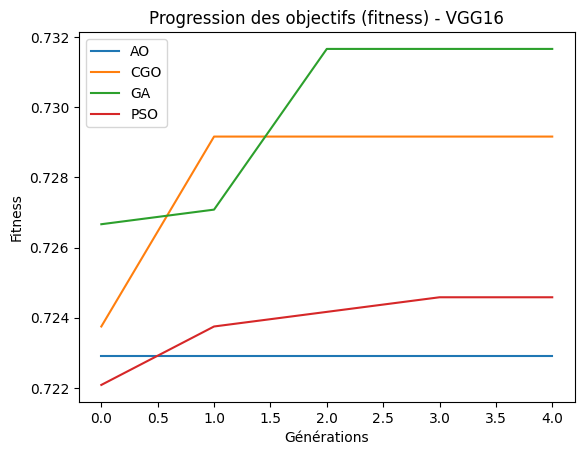

In [21]:

# Créer la figure et les axes
fig, ax = plt.subplots()

# Ajouter les courbes de fitness pour chaque algorithme
ax.plot(global_obj_list_AO, label='AO')
ax.plot(global_obj_list_CGO, label='CGO')
ax.plot(global_obj_list_GA, label='GA')
ax.plot(global_obj_list_PSO, label='PSO')

# Ajouter la légende, le titre et les labels d'axe
ax.legend()
ax.set_title('Progression des objectifs (fitness) - VGG16')
ax.set_xlabel('Générations')
ax.set_ylabel('Fitness')

# Afficher la graphique
plt.show()

* Fiteness 2
`fitness_scores=(0.99(acc)+(0.01((size_chrom-zone_select)/size_chrom)))`

In [22]:

size_chrom = x_train.shape[1]
def Calc_parm(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)  
    X_TR = []; X_TE = []        
    X_TR = x_train[:,result[0]]    
    X_TE = x_test[:,result[0]]        
    classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
    classifier3.fit(X_TR, y_train)
    y_pred = classifier3.predict(X_TE)
    acc = accuracy_score(y_test,y_pred)                
    MAt=confusion_matrix(y_test,y_pred)        
    f_score  = f1_score(y_test, y_pred, average='weighted')     
    precision= precision_score(y_test, y_pred, average='weighted')
    recall   = recall_score(y_test, y_pred, average='weighted')
    Y=y_test,y_pred    
    return acc,f_score,precision,recall,MAt

def Fitness_function(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)    
    if np.array(result).shape[1]==0 or np.array(result).shape[1]==size_chrom:
        fitness_scores = 0
    else:
        X_TR = []; X_TE = []        
        X_TR = x_train[:,result[0]]    
        X_TE = x_test[:,result[0]]        
        classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
        classifier3.fit(X_TR, y_train)
        y_pred = classifier3.predict(X_TE)
        acc = accuracy_score(y_test,y_pred)  
        zone_select=(len(result[0])) 
        fitness_scores=(0.99*(acc)+(0.01*((size_chrom-zone_select)/size_chrom)))                      
    return fitness_scores   

problem_dict1 = {
    "fit_func": Fitness_function,
    "lb": [0, ] * size_chrom,
    "ub": [1, ] * size_chrom,
    "minmax": "max",
    "log_to": None,
    "save_population": True,
}

# Run the algorithm AO
print('-----------AO-----------')
model_AO = AO.OriginalAO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_AO.solve()
print('Fitness: ', best_fitness)
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

A = Calc_parm(best_position)
print('Accuracy: ',A[0])
print('f_score: ',A[1])
print('precision: ',A[2])
print('recall: ',A[3])
model_AO.history.save_global_objectives_chart(filename="save_AO/goc2_vgg16_2")
model_AO.history.save_local_objectives_chart(filename="save_AO/loc2_vgg16_2")


print('-----------CGO-----------')

# Run the algorithm CGO
model_CGO = CGO.OriginalCGO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_CGO.solve()
print('Fitness: ', best_fitness)
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

G = Calc_parm(best_position)
print('Accuracy: ',G[0])
print('f_score: ',G[1])
print('precision: ',G[2])
print('recall: ',G[3])

model_CGO.history.save_global_objectives_chart(filename="save_CGO/goc2_vgg16_2")
model_CGO.history.save_local_objectives_chart(filename="save_CGO/loc2_vgg16_2")

# Run the algorithm AG
print('-----------AG-----------')
model_GA = GA.BaseGA(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_GA.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

AG = Calc_parm(best_position)
print('Accuracy: ',AG[0])
print('f_score: ',AG[1])
print('precision: ',AG[2])
print('recall: ',AG[3])
model_GA.history.save_global_objectives_chart(filename="save_AG/goc_vgg16_2")
model_GA.history.save_local_objectives_chart(filename="save_AG/loc_vgg16_2")

print('-----------PSO-----------')

# Run the algorithm PSO
model_PSO = PSO.CL_PSO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_PSO.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

PS = Calc_parm(best_position)
print('Accuracy: ',PS[0])
print('f_score: ',PS[1])
print('precision: ',PS[2])
print('recall: ',PS[3])

model_PSO.history.save_global_objectives_chart(filename="save_PSO/goc_vgg16_2")
model_PSO.history.save_local_objectives_chart(filename="save_PSO/loc_vgg16_2")

-----------AO-----------
Fitness:  0.7246985257680871
taille de chrom:  1032
Accuracy:  0.7270833333333333
f_score:  0.7238395230483456
precision:  0.7400589837596233
recall:  0.7270833333333333
-----------CGO-----------
Fitness:  0.7277322844400396
taille de chrom:  836
Accuracy:  0.7291666666666666
f_score:  0.7259408505588604
precision:  0.7406946959967877
recall:  0.7291666666666666
-----------AG-----------
Accuracy:  73.02988850346878 %
taille de chrom:  984
Accuracy:  0.7325
f_score:  0.7289825888453347
precision:  0.741909765433887
recall:  0.7325
-----------PSO-----------
Accuracy:  72.89028121902874 %
taille de chrom:  1016
Accuracy:  0.73125
f_score:  0.7275177475971252
precision:  0.7448367947818743
recall:  0.73125


In [23]:
# Create a dictionary with the results of AO and CGO
results_dict = {
    "AO": A[:4],
    "CGO": G[:4],
    "AG": AG[:4],
    "PSO": PS[:4]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(results_dict, orient="columns")

# Transpose the DataFrame to have algorithms as rows and metrics as columns
df = df.transpose()

# Rename the columns
df.columns = ["Accuracy", "F1 Score", "Precision", "Recall"]

# Display the DataFrame
print(df)

     Accuracy  F1 Score  Precision    Recall
AO   0.727083  0.723840   0.740059  0.727083
CGO  0.729167  0.725941   0.740695  0.729167
AG   0.732500  0.728983   0.741910  0.732500
PSO  0.731250  0.727518   0.744837  0.731250


In [24]:
global_obj_list_AO = np.array([agent[1][1] for agent in model_AO.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_CGO = np.array([agent[1][1] for agent in model_CGO.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_GA = np.array([agent[1][1] for agent in model_GA.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_PSO = np.array([agent[1][1] for agent in model_PSO.history.list_global_best])     # 2D array / matrix 2D


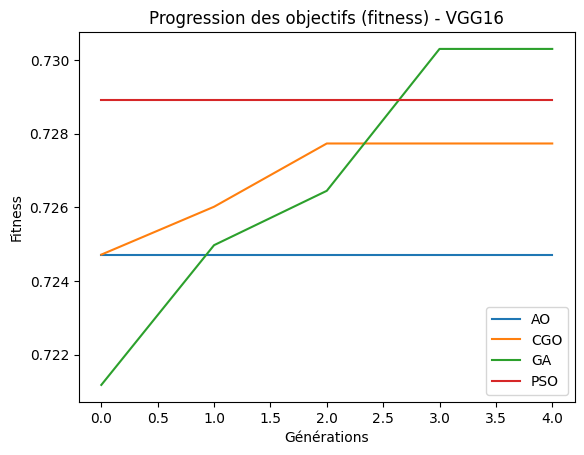

In [25]:

# Créer la figure et les axes
fig, ax = plt.subplots()

# Ajouter les courbes de fitness pour chaque algorithme
ax.plot(global_obj_list_AO, label='AO')
ax.plot(global_obj_list_CGO, label='CGO')
ax.plot(global_obj_list_GA, label='GA')
ax.plot(global_obj_list_PSO, label='PSO')

# Ajouter la légende, le titre et les labels d'axe
ax.legend()
ax.set_title('Progression des objectifs (fitness) - VGG16')
ax.set_xlabel('Générations')
ax.set_ylabel('Fitness')

# Afficher la graphique
plt.show()

## **VGG19**

574710816/574710816 [==============================] - 25s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

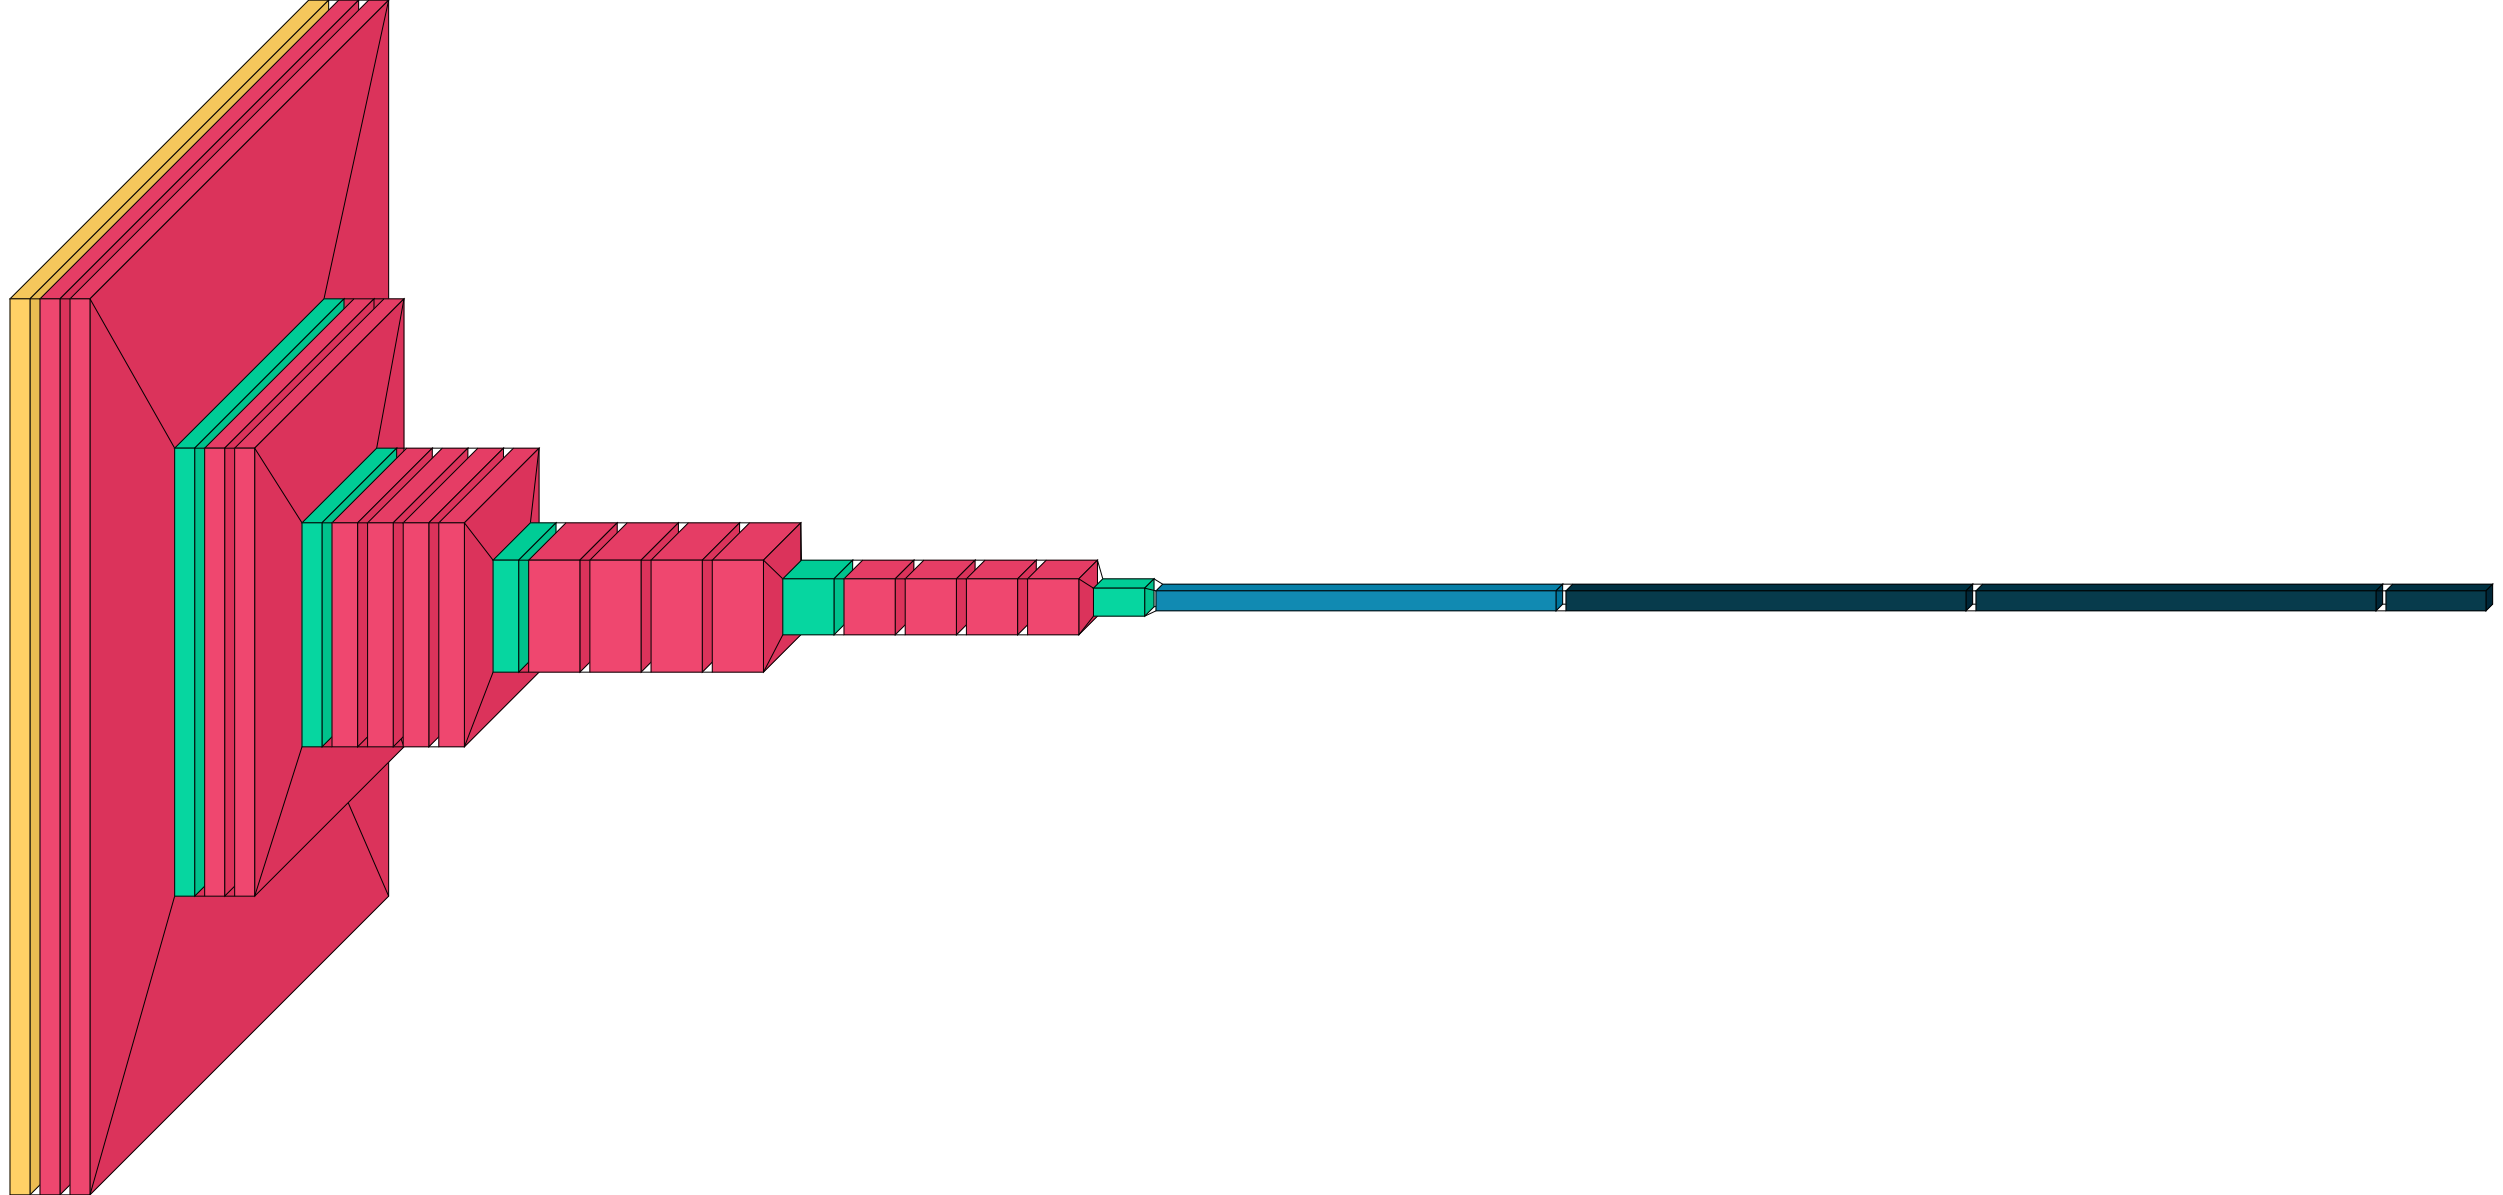

In [26]:
model_VGG19 = VGG19()
model_VGG19.summary()
visualkeras.layered_view(model_VGG19)

In [27]:
def extract_featurs_VGG19(model_VGG19, X_img):
    # remove the last layer to obtain the features from the layer before it
   model = Model(inputs=model_VGG19.inputs, outputs=model_VGG19.layers[-2].output)
   # get extracted features   
   featurs_VGG19 = []
   for i in range(X_img.shape[0]):         
         features = []
         image = X_img[i,:,:,:]
         image= keras.utils.img_to_array(image, data_format=None, dtype=None)
         image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
         image = preprocess_input(image)
         features = model.predict(image)
         featurs_VGG19.append(features)
   featurs_VGG19=np.array(featurs_VGG19)
   return  featurs_VGG19    

In [28]:
featurs_VGG19 = extract_featurs_VGG19(model_VGG19, X_img)
print(featurs_VGG19.shape)
io.savemat('/content/drive/MyDrive/dataset/Save/vgg19'+'/featurs_VGG19.mat', {'featurs_VGG19':featurs_VGG19})  
files.download('/content/drive/MyDrive/dataset/Save/vgg19'+'/featurs_VGG19.mat') 


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1/1 [==============================] - 0s 25ms/step
(8000, 1, 4096)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
mod_vgg19= io.loadmat('/content/drive/MyDrive/dataset/Save/vgg19/featurs_VGG19.mat');mod_vgg19=mod_vgg19['featurs_VGG19']
mod_vgg19.shape=(mod_vgg19.shape[0],mod_vgg19.shape[2])
print(mod_vgg19.shape)

(8000, 4096)


Accuracy:  0.7045833333333333
f_score:  0.7027593770976315
precision:  0.7165014966575622
recall:  0.7045833333333333


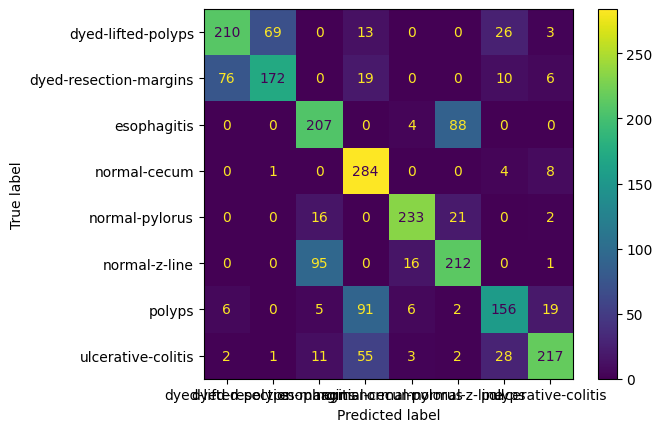

In [30]:
taux = 30
x_train, x_test, y_train, y_test = train_test_split(mod_vgg19,clas, test_size= taux/100)

classifier = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc1 = accuracy_score(y_test,y_pred)            
MAt=confusion_matrix(y_test,y_pred)       
f_score1  = f1_score(y_test, y_pred, average='weighted')     
precision1= precision_score(y_test, y_pred, average='weighted')
recall1  = recall_score(y_test, y_pred, average='weighted')
Y=y_test,y_pred
print('Accuracy: ',acc1)
print('f_score: ',f_score1)
print('precision: ',precision1)
print('recall: ',recall1)
classes = ['dyed-lifted-polyps','dyed-resection-margins','esophagitis','normal-cecum','normal-pylorus','normal-z-line','polyps','ulcerative-colitis']
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = MAt, display_labels = classes)
cm_display.plot()
plt.show()

(5600, 2040)    (2400, 2040)
Accuracy:  0.7033333333333334
f_score:  0.7015441573118596
precision:  0.7135705432923339
recall:  0.7033333333333334


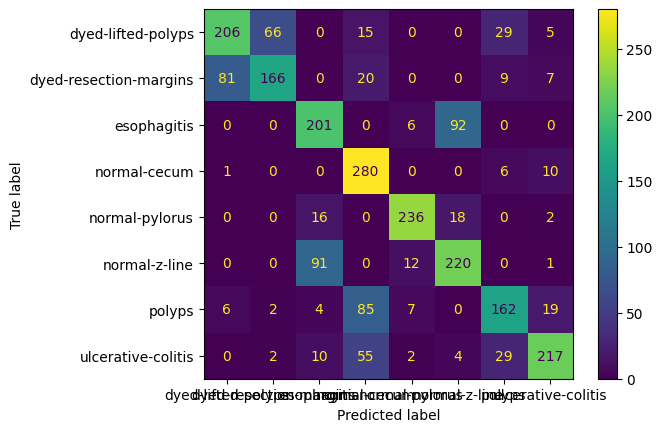

In [31]:
# ===================Exemple de selection ======================================
solution = np.random.rand(x_train.shape[1])
g = solution    
g[abs(g)>=0.5]=1
g[abs(g)<0.5]=0  
BLK = g
result = np.where(BLK == 1)   
x_train=x_train[:,result[0]]   
x_test=x_test[:,result[0]]   
print(x_train.shape,'  ',x_test.shape)

classifier = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc2 = accuracy_score(y_test,y_pred)            

MAt=confusion_matrix(y_test,y_pred)        

f_score2  = f1_score(y_test, y_pred, average='weighted')     
precision2= precision_score(y_test, y_pred, average='weighted')
recall2  = recall_score(y_test, y_pred, average='weighted')
Y=y_test,y_pred
print('Accuracy: ',acc2)
print('f_score: ',f_score2)
print('precision: ',precision2)
print('recall: ',recall2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = MAt, display_labels = classes)
cm_display.plot()
plt.show()


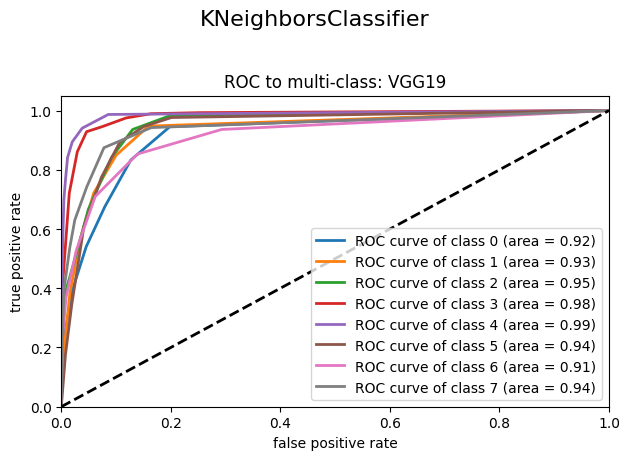

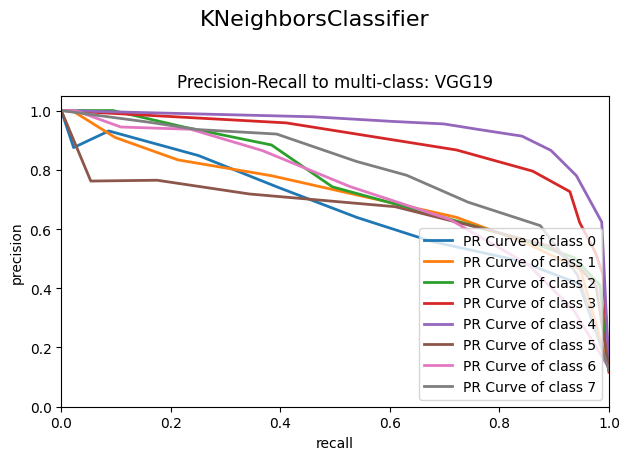

In [32]:
X = mod_vgg19
y = clas
caller='VGG19'
# Need more research to plot the ROC and PR curve for XGBoost and SVC
if not isinstance(classifier, (XGBClassifier, SVC)):
    try:
        plot_roc_curve(X, y, classifier, caller)
    except ValueError:
        print("Error: cannot plot the ROC Curve.")
        
    try:
        plot_precision_recall_curve(X, y, classifier, caller)        
    except ValueError:
        print("Error: cannot plot the PR Curve.")

**Deux algorithmes AO et CGO pour la selection d'atribut**


* Fonction Fitness 1 C Accuracy

In [33]:
size_chrom = x_train.shape[1]


def Calc_parm(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)  
    X_TR = []; X_TE = []        
    X_TR = x_train[:,result[0]]    
    X_TE = x_test[:,result[0]]        
    classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
    classifier3.fit(X_TR, y_train)
    y_pred = classifier3.predict(X_TE)
    acc = accuracy_score(y_test,y_pred)                
    MAt=confusion_matrix(y_test,y_pred)        
    f_score  = f1_score(y_test, y_pred, average='weighted')     
    precision= precision_score(y_test, y_pred, average='weighted')
    recall   = recall_score(y_test, y_pred, average='weighted')
    Y=y_test,y_pred    
    return acc,f_score,precision,recall,MAt

def Fitness_function(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)    
    if np.array(result).shape[1]==0 or np.array(result).shape[1]==size_chrom:
        acc = 0
    else:
        X_TR = []; X_TE = []        
        X_TR = x_train[:,result[0]]    
        X_TE = x_test[:,result[0]]        
        classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
        classifier3.fit(X_TR, y_train)
        y_pred = classifier3.predict(X_TE)
        acc = accuracy_score(y_test,y_pred)            
    return acc   

problem_dict1 = {
    "fit_func": Fitness_function,
    "lb": [0, ] * size_chrom,
    "ub": [1, ] * size_chrom,
    "minmax": "max",
    "log_to": None,
    "save_population": True,
}

# Run the algorithm AO
print('-----------AO-----------')
model_AO = AO.OriginalAO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_AO.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

A = Calc_parm(best_position)
print('Accuracy: ',A[0])
print('f_score: ',A[1])
print('precision: ',A[2])
print('recall: ',A[3])
model_AO.history.save_global_objectives_chart(filename="save_AO/goc_vgg19")
model_AO.history.save_local_objectives_chart(filename="save_AO/loc_vgg19")

print('-----------CGO-----------')

# Run the algorithm GWO
model_CGO = CGO.OriginalCGO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_CGO.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

G = Calc_parm(best_position)
print('Accuracy: ',G[0])
print('f_score: ',G[1])
print('precision: ',G[2])
print('recall: ',G[3])

model_CGO.history.save_global_objectives_chart(filename="save_CGO/goc_vgg19")
model_CGO.history.save_local_objectives_chart(filename="save_CGO/loc_vgg19")

# Run the algorithm AG
print('-----------AG-----------')
model_GA = GA.BaseGA(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_GA.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

AG = Calc_parm(best_position)
print('Accuracy: ',AG[0])
print('f_score: ',AG[1])
print('precision: ',AG[2])
print('recall: ',AG[3])
model_GA.history.save_global_objectives_chart(filename="save_AG/goc_vgg19")
model_GA.history.save_local_objectives_chart(filename="save_AG/loc_vgg19")

print('-----------PSO-----------')

# Run the algorithm PSO
model_PSO = PSO.CL_PSO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_PSO.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

PS = Calc_parm(best_position)
print('Accuracy: ',PS[0])
print('f_score: ',PS[1])
print('precision: ',PS[2])
print('recall: ',PS[3])

model_PSO.history.save_global_objectives_chart(filename="save_PSO/goc_vgg19")
model_PSO.history.save_local_objectives_chart(filename="save_PSO/loc_vgg19")




-----------AO-----------
Accuracy:  71.66666666666667 %
taille de chrom:  781
Accuracy:  0.7166666666666667
f_score:  0.7147771199681869
precision:  0.724977642805871
recall:  0.7166666666666667
-----------CGO-----------
Accuracy:  71.54166666666667 %
taille de chrom:  1109
Accuracy:  0.7154166666666667
f_score:  0.7143519805481766
precision:  0.7266437673153373
recall:  0.7154166666666667
-----------AG-----------
Accuracy:  71.83333333333334 %
taille de chrom:  1032
Accuracy:  0.7183333333333334
f_score:  0.7163856253287093
precision:  0.7278858368151666
recall:  0.7183333333333334
-----------PSO-----------
Accuracy:  71.08333333333333 %
taille de chrom:  1033
Accuracy:  0.7108333333333333
f_score:  0.7083801841683569
precision:  0.7187436705195517
recall:  0.7108333333333333


In [34]:
# Create a dictionary with the results of AO and CGO
results_dict = {
    "AO": A[:4],
    "CGO": G[:4],
    "AG": AG[:4],
    "PSO": PS[:4]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(results_dict, orient="columns")

# Transpose the DataFrame to have algorithms as rows and metrics as columns
df = df.transpose()

# Rename the columns
df.columns = ["Accuracy", "F1 Score", "Precision", "Recall"]

# Display the DataFrame
print('-----------Fiteness 1-----------')
print(df)

-----------Fiteness 1-----------
     Accuracy  F1 Score  Precision    Recall
AO   0.716667  0.714777   0.724978  0.716667
CGO  0.715417  0.714352   0.726644  0.715417
AG   0.718333  0.716386   0.727886  0.718333
PSO  0.710833  0.708380   0.718744  0.710833


In [35]:
global_obj_list_AO = np.array([agent[1][1] for agent in model_AO.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_CGO = np.array([agent[1][1] for agent in model_CGO.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_GA = np.array([agent[1][1] for agent in model_GA.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_PSO = np.array([agent[1][1] for agent in model_PSO.history.list_global_best])     # 2D array / matrix 2D


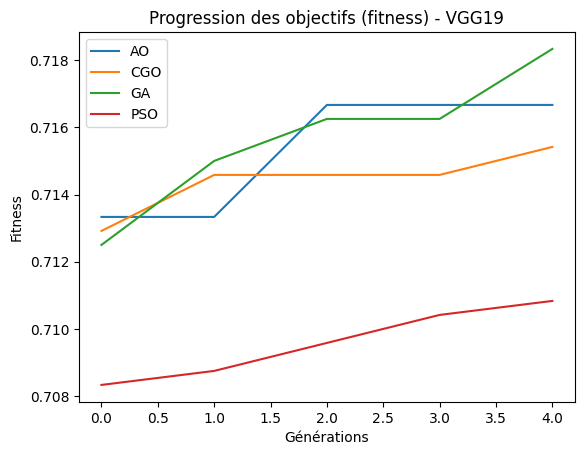

In [36]:

# Créer la figure et les axes
fig, ax = plt.subplots()

# Ajouter les courbes de fitness pour chaque algorithme
ax.plot(global_obj_list_AO, label='AO')
ax.plot(global_obj_list_CGO, label='CGO')
ax.plot(global_obj_list_GA, label='GA')
ax.plot(global_obj_list_PSO, label='PSO')

# Ajouter la légende, le titre et les labels d'axe
ax.legend()
ax.set_title('Progression des objectifs (fitness) - VGG19')
ax.set_xlabel('Générations')
ax.set_ylabel('Fitness')

# Afficher la graphique
plt.show()

* Fiteness 2
`fitness_scores=(0.99(acc)+(0.01((size_chrom-zone_select)/size_chrom)))`

In [37]:

size_chrom = x_train.shape[1]
def Calc_parm(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)  
    X_TR = []; X_TE = []        
    X_TR = x_train[:,result[0]]    
    X_TE = x_test[:,result[0]]        
    classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
    classifier3.fit(X_TR, y_train)
    y_pred = classifier3.predict(X_TE)
    acc = accuracy_score(y_test,y_pred)                
    MAt=confusion_matrix(y_test,y_pred)        
    f_score  = f1_score(y_test, y_pred, average='weighted')     
    precision= precision_score(y_test, y_pred, average='weighted')
    recall   = recall_score(y_test, y_pred, average='weighted')
    Y=y_test,y_pred    
    return acc,f_score,precision,recall,MAt

def Fitness_function(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)    
    if np.array(result).shape[1]==0 or np.array(result).shape[1]==size_chrom:
        fitness_scores = 0
    else:
        X_TR = []; X_TE = []        
        X_TR = x_train[:,result[0]]    
        X_TE = x_test[:,result[0]]        
        classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
        classifier3.fit(X_TR, y_train)
        y_pred = classifier3.predict(X_TE)
        acc = accuracy_score(y_test,y_pred)  
        zone_select=(len(result[0])) 
        fitness_scores=(0.99*(acc)+(0.01*((size_chrom-zone_select)/size_chrom)))                      
    return fitness_scores   

problem_dict1 = {
    "fit_func": Fitness_function,
    "lb": [0, ] * size_chrom,
    "ub": [1, ] * size_chrom,
    "minmax": "max",
    "log_to": None,
    "save_population": True,
}

# Run the algorithm AO
print('-----------AO-----------')
model_AO = AO.OriginalAO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_AO.solve()
print('Fitness: ', best_fitness)
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

A = Calc_parm(best_position)
print('Accuracy: ',A[0])
print('f_score: ',A[1])
print('precision: ',A[2])
print('recall: ',A[3])
model_AO.history.save_global_objectives_chart(filename="save_AO/goc2_vgg19_2")
model_AO.history.save_local_objectives_chart(filename="save_AO/loc2_vgg19_2")


print('-----------CGO-----------')

# Run the algorithm CGO
model_CGO = CGO.OriginalCGO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_CGO.solve()
print('Fitness: ', best_fitness)
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

G = Calc_parm(best_position)
print('Accuracy: ',G[0])
print('f_score: ',G[1])
print('precision: ',G[2])
print('recall: ',G[3])

model_CGO.history.save_global_objectives_chart(filename="save_CGO/goc2_vgg19_2")
model_CGO.history.save_local_objectives_chart(filename="save_CGO/loc2_vgg19_2")

# Run the algorithm AG
print('-----------AG-----------')
model_GA = GA.BaseGA(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_GA.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

AG = Calc_parm(best_position)
print('Accuracy: ',AG[0])
print('f_score: ',AG[1])
print('precision: ',AG[2])
print('recall: ',AG[3])
model_GA.history.save_global_objectives_chart(filename="save_AG/goc_vgg19_2")
model_GA.history.save_local_objectives_chart(filename="save_AG/loc_vgg19_2")

print('-----------PSO-----------')

# Run the algorithm PSO
model_PSO = PSO.CL_PSO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model_PSO.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

PS = Calc_parm(best_position)
print('Accuracy: ',PS[0])
print('f_score: ',PS[1])
print('precision: ',PS[2])
print('recall: ',PS[3])

model_PSO.history.save_global_objectives_chart(filename="save_PSO/goc_vgg19_2")
model_PSO.history.save_local_objectives_chart(filename="save_PSO/loc_vgg19_2")


-----------AO-----------
Fitness:  0.7104926470588235
taille de chrom:  996
Accuracy:  0.7125
f_score:  0.7100259442756165
precision:  0.7224193959389485
recall:  0.7125
-----------CGO-----------
Fitness:  0.7153299019607843
taille de chrom:  1019
Accuracy:  0.7175
f_score:  0.7154955499682675
precision:  0.7256498119978765
recall:  0.7175
-----------AG-----------
Accuracy:  71.95676470588236 %
taille de chrom:  996
Accuracy:  0.7216666666666667
f_score:  0.7195455077219172
precision:  0.7293713176671623
recall:  0.7216666666666667
-----------PSO-----------
Accuracy:  71.10725490196079 %
taille de chrom:  1046
Accuracy:  0.7133333333333334
f_score:  0.7116602077645718
precision:  0.7237197499259949
recall:  0.7133333333333334


In [38]:
# Create a dictionary with the results of AO and CGO
results_dict = {
    "AO": A[:4],
    "CGO": G[:4],
    "AG": AG[:4],
    "PSO": PS[:4]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(results_dict, orient="columns")

# Transpose the DataFrame to have algorithms as rows and metrics as columns
df = df.transpose()

# Rename the columns
df.columns = ["Accuracy", "F1 Score", "Precision", "Recall"]

# Display the DataFrame
print('-----------Fiteness 2-----------')
print(df)

-----------Fiteness 2-----------
     Accuracy  F1 Score  Precision    Recall
AO   0.712500  0.710026   0.722419  0.712500
CGO  0.717500  0.715496   0.725650  0.717500
AG   0.721667  0.719546   0.729371  0.721667
PSO  0.713333  0.711660   0.723720  0.713333


In [39]:
global_obj_list_AO = np.array([agent[1][1] for agent in model_AO.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_CGO = np.array([agent[1][1] for agent in model_CGO.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_GA = np.array([agent[1][1] for agent in model_GA.history.list_global_best])     # 2D array / matrix 2D

global_obj_list_PSO = np.array([agent[1][1] for agent in model_PSO.history.list_global_best])     # 2D array / matrix 2D


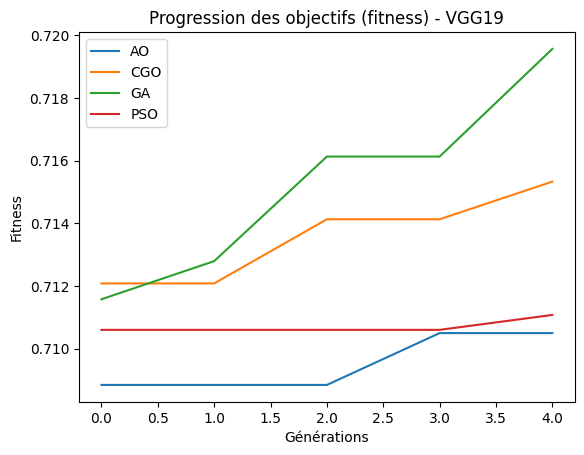

In [40]:

# Créer la figure et les axes
fig, ax = plt.subplots()

# Ajouter les courbes de fitness pour chaque algorithme
ax.plot(global_obj_list_AO, label='AO')
ax.plot(global_obj_list_CGO, label='CGO')
ax.plot(global_obj_list_GA, label='GA')
ax.plot(global_obj_list_PSO, label='PSO')

# Ajouter la légende, le titre et les labels d'axe
ax.legend()
ax.set_title('Progression des objectifs (fitness) - VGG19')
ax.set_xlabel('Générations')
ax.set_ylabel('Fitness')

# Afficher la graphique
plt.show()

## **MobileNet**

In [ ]:
model_MobileNet = MobileNet()
model_MobileNet.summary()
visualkeras.layered_view(model_MobileNet)

In [1]:
def extract_featurs_MobileNet(X_img):
   model = MobileNet()
   # model.summary()
   model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
   # get extracted features   
   featurs_MobileNet = []
   for i in range(X_img.shape[0]):         
         features = []
         image = X_img[i,:,:,:]
         image= keras.utils.img_to_array(image, data_format=None, dtype=None)
         image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
         image = preprocess_input(image)
         features = model.predict(image)
         featurs_MobileNet.append(features)
   featurs_MobileNet=np.array(featurs_MobileNet)
   return  featurs_MobileNet 

In [ ]:
featurs_MobileNet = extract_featurs_MobileNet(model_MobileNet,X_img)
print(featurs_MobileNet.shape)
io.savemat('/content/drive/MyDrive/dataset/Save/mobilenet'+'/featurs_MobileNet.mat', {'featurs_MobileNet':featurs_MobileNet})  
files.download('/content/drive/MyDrive/dataset/Save/mobilenet'+'/featurs_MobileNet.mat') 

TypeError: ignored

In [ ]:
mod_MobileNet= io.loadmat('/content/drive/MyDrive/dataset/Save/mobilenet/featurs_MobileNet.mat');mod_MobileNet=mod_MobileNet['featurs_MobileNet']
mod_MobileNet.shape=(mod_MobileNet.shape[0],mod_MobileNet.shape[2])
print(mod_MobileNet.shape)

(8000, 1000)


Accuracy:  0.7645833333333333
f_score:  0.7614280953591597
precision:  0.7784695805438908
recall:  0.7645833333333333


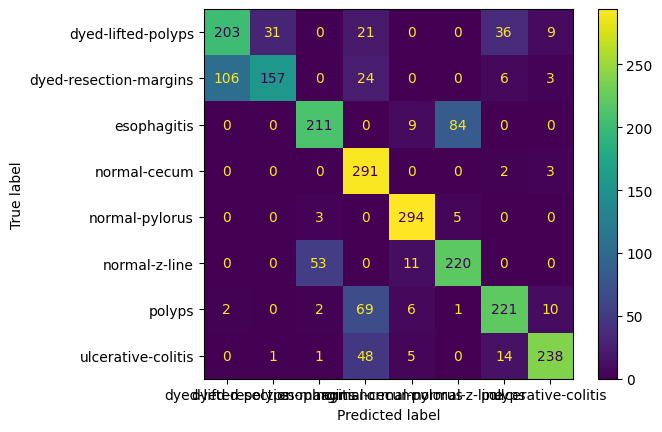

In [ ]:
taux = 30
x_train, x_test, y_train, y_test = train_test_split(mod_MobileNet,clas, test_size= taux/100)

classifier = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc1 = accuracy_score(y_test,y_pred)            
MAt=confusion_matrix(y_test,y_pred)       
f_score1  = f1_score(y_test, y_pred, average='weighted')     
precision1= precision_score(y_test, y_pred, average='weighted')
recall1  = recall_score(y_test, y_pred, average='weighted')
Y=y_test,y_pred
print('Accuracy: ',acc1)
print('f_score: ',f_score1)
print('precision: ',precision1)
print('recall: ',recall1)
classes = ['dyed-lifted-polyps','dyed-resection-margins','esophagitis','normal-cecum','normal-pylorus','normal-z-line','polyps','ulcerative-colitis']
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = MAt, display_labels = classes)
cm_display.plot()
plt.show()

(5600, 511)    (2400, 511)
Accuracy:  0.7629166666666667
f_score:  0.7596263219642281
precision:  0.781271722932112
recall:  0.7629166666666667


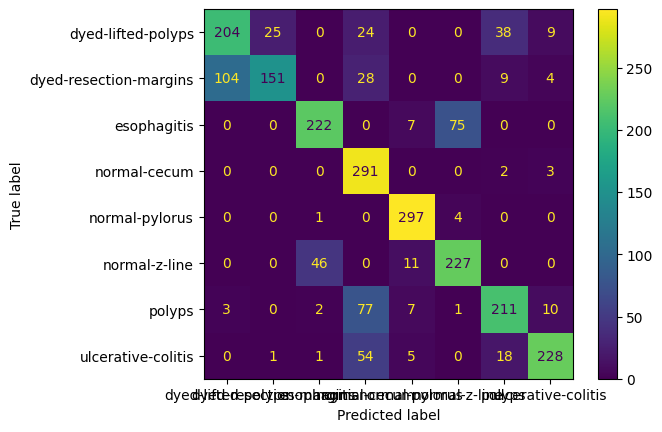

In [ ]:
# ===================Exemple de selection ======================================
solution = np.random.rand(x_train.shape[1])
g = solution    
g[abs(g)>=0.5]=1
g[abs(g)<0.5]=0  
BLK = g
result = np.where(BLK == 1)   
x_train=x_train[:,result[0]]   
x_test=x_test[:,result[0]]   
print(x_train.shape,'  ',x_test.shape)

classifier = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc2 = accuracy_score(y_test,y_pred)            

MAt=confusion_matrix(y_test,y_pred)        

f_score2  = f1_score(y_test, y_pred, average='weighted')     
precision2= precision_score(y_test, y_pred, average='weighted')
recall2  = recall_score(y_test, y_pred, average='weighted')
Y=y_test,y_pred
print('Accuracy: ',acc2)
print('f_score: ',f_score2)
print('precision: ',precision2)
print('recall: ',recall2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = MAt, display_labels = classes)
cm_display.plot()
plt.show()


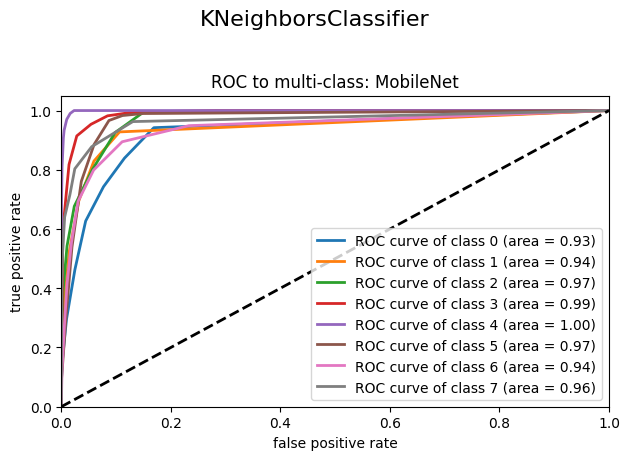

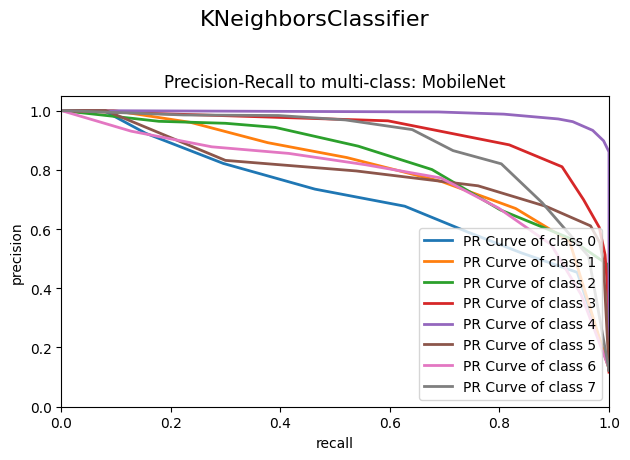

In [ ]:
X = mod_MobileNet
y = clas
caller='MobileNet'
# Need more research to plot the ROC and PR curve for XGBoost and SVC
if not isinstance(classifier, (XGBClassifier, SVC)):
    try:
        plot_roc_curve(X, y, classifier, caller)
    except ValueError:
        print("Error: cannot plot the ROC Curve.")
        
    try:
        plot_precision_recall_curve(X, y, classifier, caller)        
    except ValueError:
        print("Error: cannot plot the PR Curve.")

**Deux algorithmes AO et CGO pour la selection d'atribut**


* Fonction Fitness 1 C Accuracy

In [ ]:
size_chrom = x_train.shape[1]


def Calc_parm(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)  
    X_TR = []; X_TE = []        
    X_TR = x_train[:,result[0]]    
    X_TE = x_test[:,result[0]]        
    classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
    classifier3.fit(X_TR, y_train)
    y_pred = classifier3.predict(X_TE)
    acc = accuracy_score(y_test,y_pred)                
    MAt=confusion_matrix(y_test,y_pred)        
    f_score  = f1_score(y_test, y_pred, average='weighted')     
    precision= precision_score(y_test, y_pred, average='weighted')
    recall   = recall_score(y_test, y_pred, average='weighted')
    Y=y_test,y_pred    
    return acc,f_score,precision,recall,MAt

def Fitness_function(solution):    
    g = solution    
    g[abs(g)>=0.5]=1
    g[abs(g)<0.5]=0  
    BLK = g
    result = np.where(BLK == 1)    
    if np.array(result).shape[1]==0 or np.array(result).shape[1]==size_chrom:
        acc = 0
    else:
        X_TR = []; X_TE = []        
        X_TR = x_train[:,result[0]]    
        X_TE = x_test[:,result[0]]        
        classifier3 = KNeighborsClassifier(n_neighbors=np.unique(clas).shape[0])
        classifier3.fit(X_TR, y_train)
        y_pred = classifier3.predict(X_TE)
        acc = accuracy_score(y_test,y_pred)            
    return acc   

problem_dict1 = {
    "fit_func": Fitness_function,
    "lb": [0, ] * size_chrom,
    "ub": [1, ] * size_chrom,
    "minmax": "max",
    "log_to": None,
    "save_population": True,
}

# Run the algorithm AO
print('-----------AO-----------')
model = AO.OriginalAO(problem_dict1, epoch=5, pop_size=50, pr=0.03)

best_position, best_fitness = model.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

A = Calc_parm(best_position)
print('Accuracy: ',A[0])
print('f_score: ',A[1])
print('precision: ',A[2])
print('recall: ',A[3])
model.history.save_global_objectives_chart(filename="save_AO/goc_mobilenet")
model.history.save_local_objectives_chart(filename="save_AO/loc_mobilenet")

print('-----------CGO-----------')

# Run the algorithm GWO
model = CGO.OriginalCGO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

G = Calc_parm(best_position)
print('Accuracy: ',G[0])
print('f_score: ',G[1])
print('precision: ',G[2])
print('recall: ',G[3])

model.history.save_global_objectives_chart(filename="save_CGO/goc_mobilenet")
model.history.save_local_objectives_chart(filename="save_CGO/loc_mobilenet")

# Run the algorithm AG
print('-----------AG-----------')
model = GA.BaseGA(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

AG = Calc_parm(best_position)
print('Accuracy: ',AG[0])
print('f_score: ',AG[1])
print('precision: ',AG[2])
print('recall: ',AG[3])
model.history.save_global_objectives_chart(filename="save_AG/goc_mobilenet")
model.history.save_local_objectives_chart(filename="save_AG/loc_mobilenet")

print('-----------PSO-----------')

# Run the algorithm PSO
model = PSO.CL_PSO(problem_dict1, epoch=5, pop_size=50, pr=0.03)
best_position, best_fitness = model.solve()
print('Accuracy: ', best_fitness*100,'%')
print('taille de chrom: ',np.where(best_position == 1)[0].shape[0])

PS = Calc_parm(best_position)
print('Accuracy: ',PS[0])
print('f_score: ',PS[1])
print('precision: ',PS[2])
print('recall: ',PS[3])

model.history.save_global_objectives_chart(filename="save_PSO/goc_mobilenet")
model.history.save_local_objectives_chart(filename="save_PSO/loc_mobilenet")




-----------AO-----------


TypeError: ignored

In [ ]:
# Create a dictionary with the results of AO and CGO
results_dict = {
    "AO": A[:4],
    "CGO": G[:4],
    "AG": AG[:4],
    "PSO": PS[:4]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(results_dict, orient="columns")

# Transpose the DataFrame to have algorithms as rows and metrics as columns
df = df.transpose()

# Rename the columns
df.columns = ["Accuracy", "F1 Score", "Precision", "Recall"]

# Display the DataFrame
print('-----------Fiteness 1-----------')
print(df)

* Fiteness 2
`fitness_scores=(0.99(acc)+(0.01((size_chrom-zone_select)/size_chrom)))`

In [ ]:
## **VGG16**